In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys
from Backtester import Backtester
from simulator import Simulator
from utils import *
from datetime import datetime


os.chdir('/Users/yinki/OneDrive/Python/Crypto Whales')
print(os.getcwd())

Pool_address = '0xcbcdf9626bc03e24f779434178a73a0b4bad62ed' # WETH/WBTC pool 0.3% fee
simulator = Simulator(Address='0xcbcdf9626bc03e24f779434178a73a0b4bad62ed')


c:\Users\yinki\OneDrive\Python\Crypto Whales
c:\Users\yinki\OneDrive\Python\Crypto Whales
Initializing Backtester...


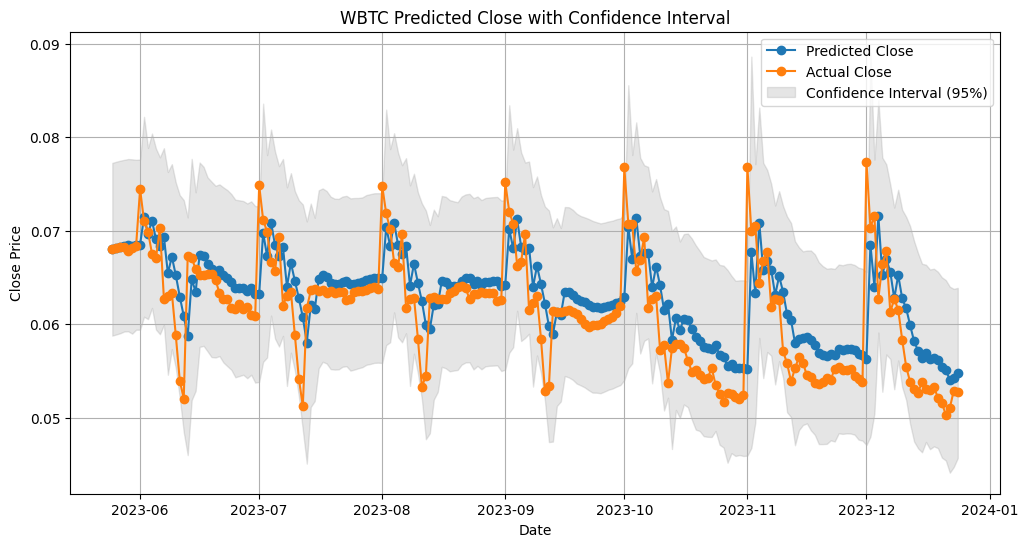

In [2]:
# Looking over our test period as well as our ARIMA-GARCH predictions

start_date = "2023-05-25"
end_date = "2023-12-24"
df = pd.read_csv('data/pools_daily_weth_btc_arima_garch.csv', index_col=0, parse_dates=True, sep=';').loc['2023-05-25':'2023-12-24']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Predicted Close (WBTC)'], label='Predicted Close', marker='o')
plt.plot(df.index, df['Close (WBTC)'], label='Actual Close', marker='o')
plt.fill_between(df.index, df['Predicted Close (WBTC)'] - 1.96 * df['Conditional Volatility'], df['Predicted Close (WBTC)'] + 1.96 * df['Conditional Volatility'], color='gray', alpha=0.2, label='Confidence Interval (95%)')
plt.title('WBTC Predicted Close with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Simulating based on our desired parameters initial investment, number of individual windows and risk level

risk_param = 0.90
initial_investment = 1000000
windows = 10

results = simulator.simulate(windows, risk_param, initial_investment)

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Test Period: 2023-05-25 to 2023-06-14
Lower Bound: 0.05597124772416764, Upper Bound: 0.0757715636672533


c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1000000, BTC-USD: 26225.4140625
Initial Amounts: 19.065475908536953 token0, 280.1827242846707 token1
Final Amounts: 17.61627376002582 token0, 301.47993228288465 token1
Simulated Position returned 0.16022031790134597 in  20  days, for an APR of  2.9240208016995646
Base position returned 1.6836259656339376e-17 in  20  days, for an APR of  3.0726173872819364e-16
Fees in token 0 and token 1 0.02736444284888654 0.49828594618879857
Total Fees in USD 2224.25383520343
Your liquidity was active for: 35.83519198193112
Final Net Liquidity Value of LP Investment (WBTC):  38.151152290996535
Fees: 2224.25383520343, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-05-25 to 2023-06-14: 984045.9536850683 USD
HODL 50-50- Start Value: 1000000, End_Value: 982011.0076989578
-------------------------------------------------------------------
Test Period: 2023-06-15 to 2023-07-05
Lower Bound: 0.05436052989531858, Upper Bound: 0.07240949533939837


c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 984045.9536850683, BTC-USD: 25195.00390625
Initial Amounts: 19.528592996982248 token0, 296.44502335195335 token1
Final Amounts: 14.654427060806672 token0, 370.43510727628666 token1
Simulated Position returned 0.38572477754558354 in  20  days, for an APR of  7.0394771902069
Base position returned 3.579468149433022e-17 in  20  days, for an APR of  6.532529372715265e-16
Fees in token 0 and token 1 0.06726649645928995 1.3687944076210259
Total Fees in USD 5838.010195028945
Your liquidity was active for: 48.55338692581255
Final Net Liquidity Value of LP Investment (WBTC):  39.03381671018403
Fees: 5838.010195028945, Hedging Costs: 0, Payoff: 535.8312500000029
Current Value USD at end of period 2023-06-15 to 2023-07-05: 1179460.5335919443 USD
HODL 50-50- Start Value: 982011.0076989578, End_Value: 1126956.9115217165
-------------------------------------------------------------------
Test Period: 2023-07-06 to 2023-07-26
Lower Bound: 0.05614529124887732, Upper Bound: 0.07

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1179460.5335919443, BTC-USD: 30405.30078125
Initial Amounts: 19.39563995892586 token0, 309.06341189839975 token1
Final Amounts: 20.645708557870847 token0, 289.14396262448236 token1
Simulated Position returned 0.1906060630451874 in  20  days, for an APR of  3.4785606505746705
Base position returned 1.8779807194329118e-17 in  20  days, for an APR of  3.4273148129650644e-16
Fees in token 0 and token 1 0.039017482564786224 0.5492332878832795
Total Fees in USD 2772.4613488542254
Your liquidity was active for: 29.977183717256406
Final Net Liquidity Value of LP Investment (WBTC):  38.74330650784342
Fees: 2772.4613488542254, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-07-06 to 2023-07-26: 1143125.8151143272 USD
HODL 50-50- Start Value: 1126956.9115217165, End_Value: 1073987.9513403391
-------------------------------------------------------------------
Test Period: 2023-07-27 to 2023-08-16
Lower Bound: 0.05489695043504098, Upper Bound: 0.072110951

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1143125.8151143272, BTC-USD: 29341.669921875
Initial Amounts: 19.479562992801856 token0, 306.4086103532263 token1
Final Amounts: 17.41079663837369 token0, 338.94978307050343 token1
Simulated Position returned 0.07444646216609299 in  20  days, for an APR of  1.3586479345311968
Base position returned 7.551175306423802e-18 in  20  days, for an APR of  1.378089493422344e-16
Fees in token 0 and token 1 0.01081957687343241 0.2921981769378501
Total Fees in USD 1116.2070363716864
Your liquidity was active for: 20.30595964549054
Final Net Liquidity Value of LP Investment (WBTC):  38.963927883326356
Fees: 1116.2070363716864, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-07-27 to 2023-08-16: 1128182.5631639475 USD
HODL 50-50- Start Value: 1073987.9513403391, End_Value: 1066726.2428071275
-------------------------------------------------------------------
Test Period: 2023-08-17 to 2023-09-06
Lower Bound: 0.05552286021860325, Upper Bound: 0.07216655866

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1128182.5631639475, BTC-USD: 28534.513671875
Initial Amounts: 19.768736487630047 token0, 314.6275482441965 token1
Final Amounts: 20.938740014259615 token0, 296.0064623062628 token1
Simulated Position returned 0.2373983552389961 in  20  days, for an APR of  4.332519983111679
Base position returned 2.0133729380264605e-17 in  20  days, for an APR of  3.67440561189829e-16
Fees in token 0 and token 1 0.0488407572428778 0.7121186827622412
Total Fees in USD 3538.69143287566
Your liquidity was active for: 31.813791932069968
Final Net Liquidity Value of LP Investment (WBTC):  39.445552866993026
Fees: 3538.69143287566, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-08-17 to 2023-09-06: 1026681.8691192231 USD
HODL 50-50- Start Value: 1066726.2428071275, End_Value: 947095.3522836554
-------------------------------------------------------------------
Test Period: 2023-09-07 to 2023-09-27
Lower Bound: 0.05328956000201085, Upper Bound: 0.07592167084048487


c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1026681.8691192231, BTC-USD: 25740.744140625
Initial Amounts: 19.9427387085301 token0, 314.20239883681137 token1
Final Amounts: 14.269994369430579 token0, 403.57778029184846 token1
Simulated Position returned 0.11910183353277856 in  20  days, for an APR of  2.173608461973209
Base position returned 1.3310688134234535e-17 in  20  days, for an APR of  2.4292005844978025e-16
Fees in token 0 and token 1 0.01587995046223632 0.5348308072844069
Total Fees in USD 1912.9030098160383
Your liquidity was active for: 34.15342068548254
Final Net Liquidity Value of LP Investment (WBTC):  39.802321722381585
Fees: 1912.9030098160383, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-09-07 to 2023-09-27: 1023773.6243081597 USD
HODL 50-50- Start Value: 947095.3522836554, End_Value: 945063.3285434198
-------------------------------------------------------------------
Test Period: 2023-09-28 to 2023-10-18
Lower Bound: 0.04701304708907616, Upper Bound: 0.069633885206

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1023773.6243081597, BTC-USD: 26419.205078125
Initial Amounts: 19.375556934448422 token0, 318.8993688827737 token1
Final Amounts: 11.187659623691069 token0, 453.66273561909156 token1
Simulated Position returned 0.3053301861990322 in  20  days, for an APR of  5.572275898132338
Base position returned 3.735577734187203e-17 in  20  days, for an APR of  6.817429364891645e-16
Fees in token 0 and token 1 0.04686094822887348 1.3365970314173747
Total Fees in USD 5238.447151402429
Your liquidity was active for: 48.45983934104811
Final Net Liquidity Value of LP Investment (WBTC):  39.23920465724438
Fees: 5238.447151402429, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-09-28 to 2023-10-18: 1048511.011897044 USD
HODL 50-50- Start Value: 945063.3285434198, End_Value: 977767.2614183669
-------------------------------------------------------------------
Test Period: 2023-10-19 to 2023-11-08
Lower Bound: 0.04522580895704864, Upper Bound: 0.06686475207989598


c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1048511.011897044, BTC-USD: 28399.84375
Initial Amounts: 18.459802475093618 token0, 335.6973140451818 token1
Final Amounts: 15.24072826070704 token0, 394.2371911072303 token1
Simulated Position returned 0.607782970590978 in  20  days, for an APR of  11.092039213285346
Base position returned 7.390939715854217e-17 in  20  days, for an APR of  1.3488464981433948e-15
Fees in token 0 and token 1 0.11040640603337033 2.2180179936310482
Total Fees in USD 9854.63195732687
Your liquidity was active for: 56.44622277522062
Final Net Liquidity Value of LP Investment (WBTC):  37.261857162870086
Fees: 9854.63195732687, Hedging Costs: 0, Payoff: 1297.3249755859376
Current Value USD at end of period 2023-10-19 to 2023-11-08: 1295345.1602286913 USD
HODL 50-50- Start Value: 977767.2614183669, End_Value: 1201127.7402248573
-------------------------------------------------------------------
Test Period: 2023-11-09 to 2023-11-29
Lower Bound: 0.04618116239926203, Upper Bound: 0.072770

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1295345.1602286913, BTC-USD: 35857.17578125
Initial Amounts: 18.062565330452454 token0, 341.5300522018216 token1
Final Amounts: 19.24934048029349 token0, 319.090306160118 token1
Simulated Position returned 0.594790515723733 in  20  days, for an APR of  10.854926911958126
Base position returned 8.56759942960767e-17 in  20  days, for an APR of  1.5635868959033998e-15
Fees in token 0 and token 1 0.10905910391551613 1.860564022595242
Total Fees in USD 9014.84678078397
Your liquidity was active for: 60.891027071670486
Final Net Liquidity Value of LP Investment (WBTC):  36.274222240791445
Fees: 9014.84678078397, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-11-09 to 2023-11-29: 1393214.034172286 USD
HODL 50-50- Start Value: 1201127.7402248573, End_Value: 1295487.6214109268
-------------------------------------------------------------------
Test Period: 2023-11-30 to 2023-12-24
Lower Bound: 0.04542779868026784, Upper Bound: 0.06446992057317845
Ini

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


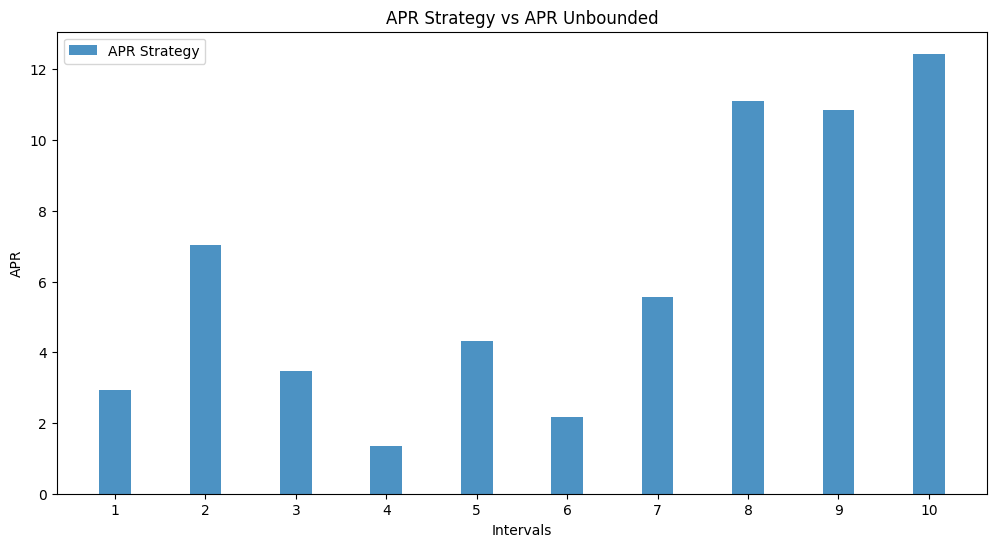

,APR Strategy,APR Unbounded
1,2.924021,3.072617e-16
2,7.039477,6.532529e-16
3,3.478561,3.427315e-16
4,1.358648,1.378089e-16
5,4.332520,3.674406e-16
6,2.173608,2.429201e-16
7,5.572276,6.817429e-16
8,11.092039,1.348846e-15
9,10.854927,1.563587e-15
10,12.442251,1.332407e-15


In [4]:
results.keys()

# Plotting APR Strategy vs APR Unbounded Bar Graphs

# Generate x-axis values
intervals = np.arange(1, windows + 1)

# Plotting APR Strategy
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
bar_positions_strategy = intervals 
ax.bar(bar_positions_strategy, results['APR Strategy'], bar_width, label='APR Strategy', alpha=0.8)
#ax.bar(bar_positions_unbounded, results['APR Unbounded'], bar_width, label='APR Unbounded', alpha=0.8)
ax.set_xlabel('Intervals')
ax.set_ylabel('APR')
ax.set_title('APR Strategy vs APR Unbounded')
ax.set_xticks(intervals)
ax.legend()
plt.show()

'''
# Plotting APR Unbounded
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
bar_positions_unbounded = intervals 
ax.bar(bar_positions_unbounded, results['APR Unbounded'], bar_width, label='APR Unbounded', alpha=0.8, color='orange')
ax.set_xlabel('Intervals')
ax.set_ylabel('APR')
ax.set_title('APR Strategy')
ax.set_xticks(intervals)
ax.legend()
plt.show()
'''


# Table of APRs
apr_results = pd.DataFrame({
    'APR Strategy': results['APR Strategy'],
    'APR Unbounded': results['APR Unbounded']
}, index=intervals)
apr_results

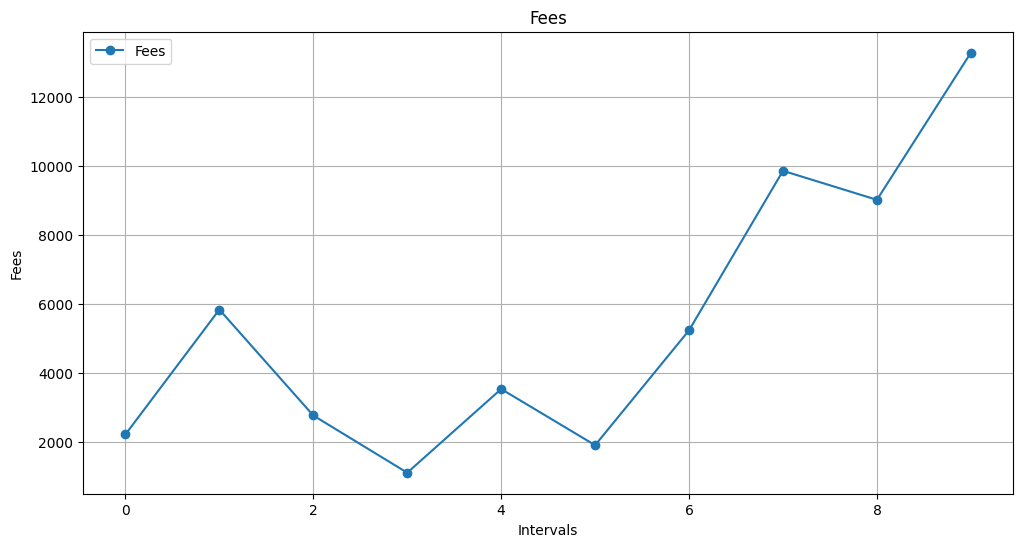

In [5]:
# Plot Fees line graph
plt.figure(figsize=(12, 6))
plt.plot(results['Fee USD'], label='Fees', marker='o')
plt.title('Fees')
plt.xlabel('Intervals')
plt.ylabel('Fees')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 0, 'Intervals')

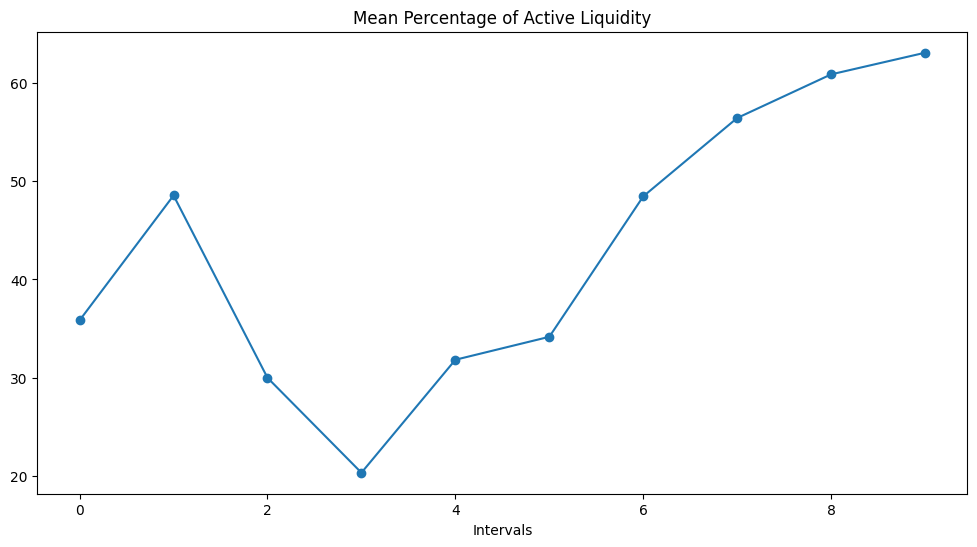

In [6]:
# Plot Mean Percentage of Active Liquidity
plt.figure(figsize=(12, 6))
plt.plot(results['Mean Percentage of Active Liquidity'], label='Mean Percentage of Active Liquidity', marker='o')
plt.title('Mean Percentage of Active Liquidity')
plt.xlabel('Intervals')


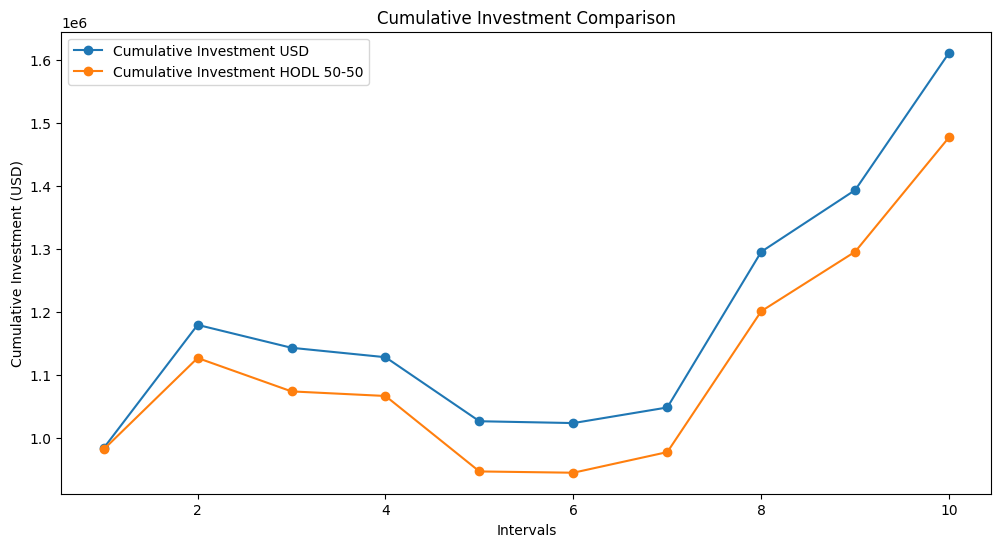

<AxesSubplot: title={'center': 'Cumulative Investment Comparison'}>

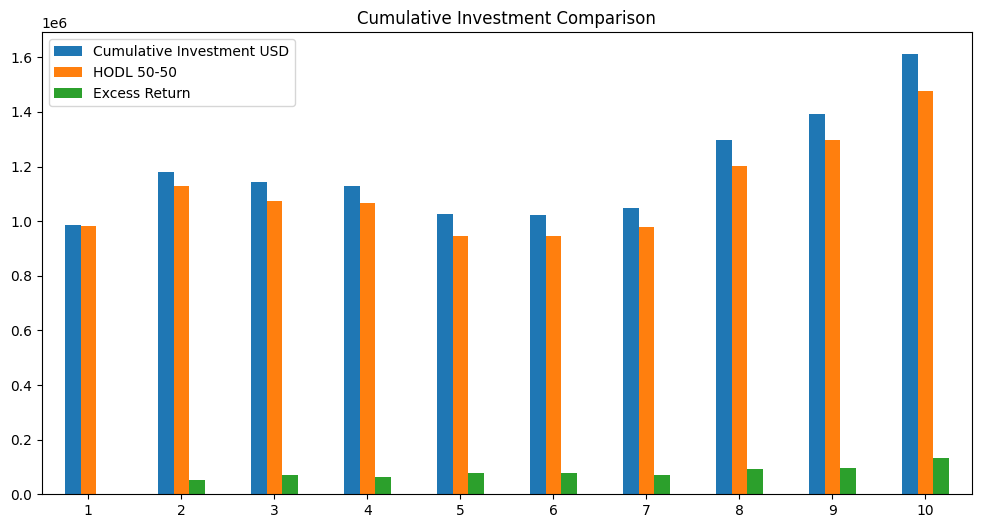

In [7]:
# Plot Cumulative Investment USD vs HODL 50-50

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(intervals, results['Cumulative Investment USD'], label='Cumulative Investment USD', marker='o')
ax.plot(intervals, results['HODL 50-50'], label='Cumulative Investment HODL 50-50', marker='o')

ax.set_xlabel('Intervals')
ax.set_ylabel('Cumulative Investment (USD)')
ax.set_title('Cumulative Investment Comparison')
ax.legend()

plt.show()


# Show Table of Cumulative Investment USD vs HODL 50-50
cumulative_results = pd.DataFrame({
    'Cumulative Investment USD': results['Cumulative Investment USD'],
    'HODL 50-50': results['HODL 50-50']
}, index=intervals)
cumulative_results['Excess Return'] = (cumulative_results['Cumulative Investment USD'] - cumulative_results['HODL 50-50'])

cumulative_results.plot.bar(figsize=(12, 6), rot=0, title='Cumulative Investment Comparison')

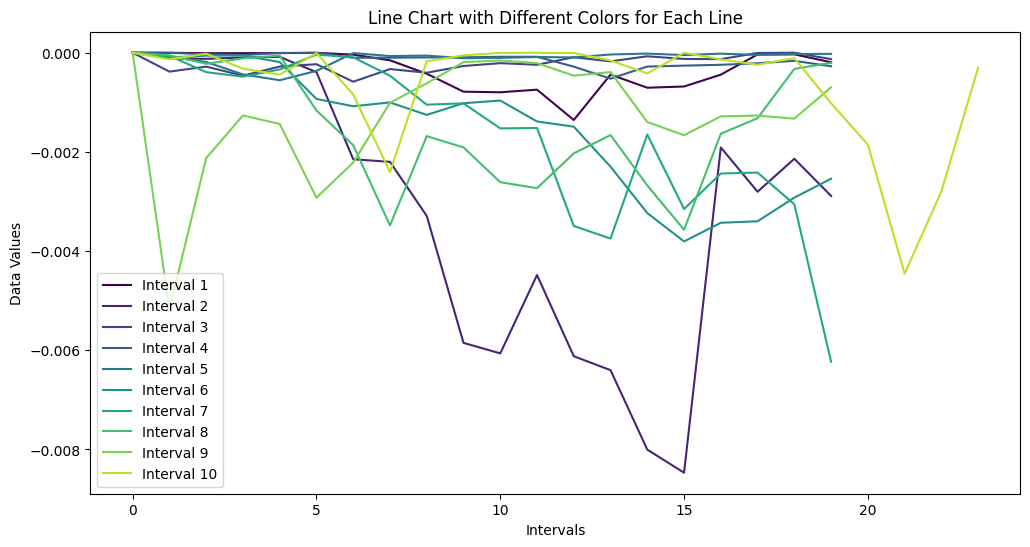

,Mean,Standard Deviation,Minimum,Maximum
1,-0.000343,0.000380,-0.001357,0.0
2,-0.003179,0.002722,-0.008470,0.0
3,-0.000220,0.000155,-0.000585,0.0
4,-0.000144,0.000131,-0.000523,0.0
5,-0.000118,0.000150,-0.000555,0.0
6,-0.001558,0.001240,-0.003806,0.0
7,-0.001658,0.001603,-0.006232,0.0
8,-0.001466,0.001144,-0.003571,0.0
9,-0.001291,0.001166,-0.005173,0.0
10,-0.000662,0.001096,-0.004455,0.0


In [8]:
IL = results['Impermanent Loss']

x_values = [i for i in range(1, windows + 1)]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

for i, data in enumerate(IL):
    color = plt.cm.viridis(i / len(IL))  # Use a colormap to get different colors for each line
    ax.plot(range(len(data)), data, label=f'Interval {i+1}', color=color)

ax.set_xlabel('Intervals')
ax.set_ylabel('Data Values')
ax.set_title('Line Chart with Different Colors for Each Line')
ax.legend()

plt.show()

IL_Statistics = []
for i in range(len(IL)):
    IL_Statistics.append([np.mean(IL[i]), np.std(IL[i]), np.min(IL[i]), np.max(IL[i])])
    
IL_Statistics = pd.DataFrame(IL_Statistics, columns=['Mean', 'Standard Deviation', 'Minimum', 'Maximum'], index=x_values)
IL_Statistics


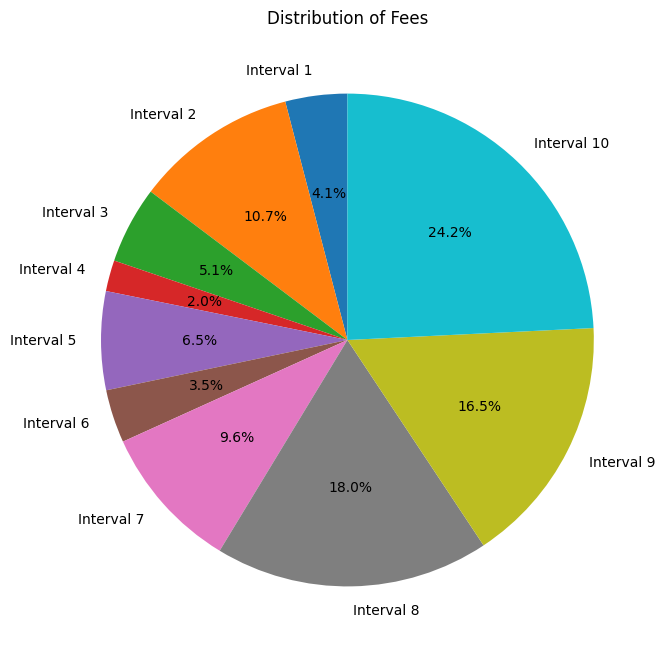

In [9]:
# Pie Chart of Fees Earned, dont really say much
fees = results['Fee USD']

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(fees, labels=[f'Interval {i+1}' for i in range(len(fees))], autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Fees')
plt.show()